In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
import scipy.linalg as la
import scipy.interpolate as interp
import scipy.fftpack as fft
import scipy.signal as signal
import math
import statsmodels.api as sm
import scipy.interpolate as interp

from scipy.integrate import odeint
from scipy.optimize import minimize

**Хищник-жертва**

Период экспериментальный = 80 теоретический = 62
Среднее Хищник экспериментальный = 84 теоретический = 100
Среднее Жертва экспериментальный = 111 теоретический = 100



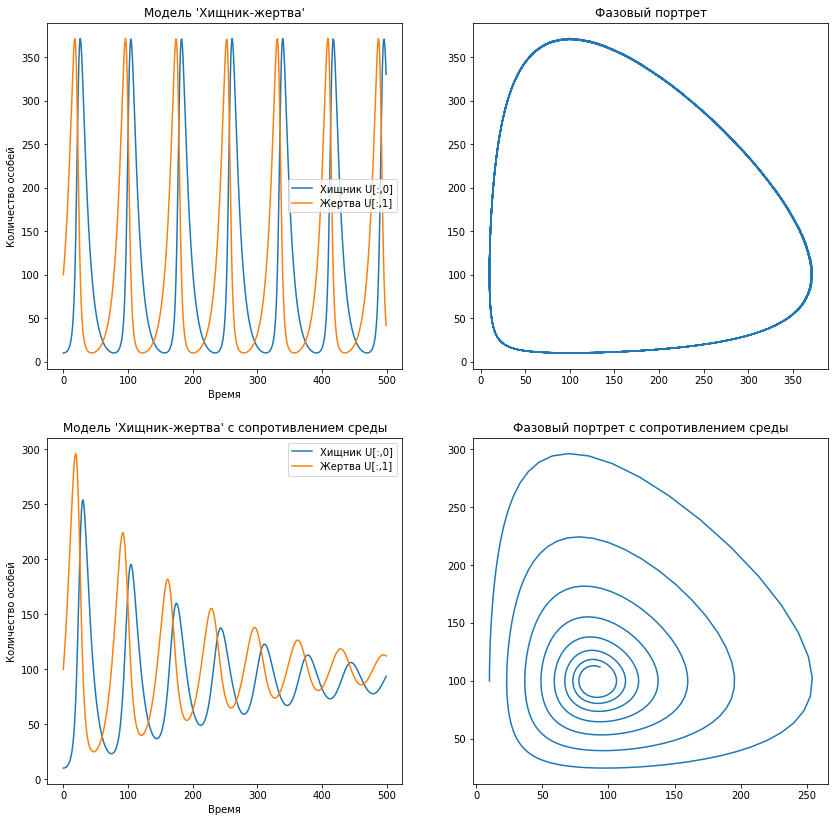

In [2]:
def System(U, t):
    f1 = -a1 * U[0] + gam1 * U[0]*U[1]
    f2 = a2 * U[1] - gam1 * U[0]*U[1] - b2*U[1]**2
    return [f1, f2]

# БЕЗ СОПРОТИВЛЕНИЯ СРЕДЫ
a1 = 0.1   # интеснсивность потребления ресурса
a2 = 0.1   # интенсивность возобновления ресурс  // = 0 для взлет-падение (ресурс невозобновляемый)
b2 = 0     # коэффициент давления среды          // = 0 для взлет -падение
gam1 = 0.001
gam2 = 0.001
t = np.arange(0, 500)
u0 = [10, 100]  # 10 - начальное количетсво хищников, 100 - начальное колич жертв
U = odeint(System, u0, t) # интегрирование диф уравнений

fig, axs = plt.subplots(2, 2, figsize=(14,14))
axs[0, 0].set_title("Модель 'Хищник-жертва'")
axs[0, 0].plot(t, abs(U[:,0]), label='Хищник U[:,0]')
axs[0, 0].plot(t, abs(U[:,1]), label='Жертва U[:,1]')
axs[0, 0].set_xlabel('Время')
axs[0, 0].set_ylabel('Количество особей')
axs[0, 0].legend()
 
# Фазовый портрет
axs[0, 1].set_title("Фазовый портрет")
axs[0, 1].plot(abs(U[:,0]), abs(U[:,1]))

# С СОПРОТИВЛЕНИЯ СРЕДЫ
a1 = 0.1   # интеснсивность потребления ресурса
a2 = 0.1   # интенсивность возобновления ресурса
gam1 = 0.001
gam2 = 0.001
b2 = 0.0001     # коэффициент давления среды
U = odeint(System, u0, t) # интегрирование диф уравнений
axs[1, 0].set_title("Модель 'Хищник-жертва' с сопротивлением среды")
axs[1, 0].plot(t, abs(U[:,0]), label='Хищник U[:,0]')
axs[1, 0].plot(t, abs(U[:,1]), label='Жертва U[:,1]')
axs[1, 0].set_xlabel('Время')
axs[1, 0].set_ylabel('Количество особей')
axs[1, 0].legend()

axs[1, 1].set_title("Фазовый портрет с сопротивлением среды")
axs[1, 1].plot(abs(U[:,0]), abs(U[:,1]))


# ПЕРИОД и СРЕДНИЕ ЗНАЧЕНИЯ
T_exp = 80  # экспериментальный (по графику)
T_teor = (2 * 3.14) / np.sqrt(a1 * a2)  # теоретический (по формулам)
# Среднее Хищник
U_exp = np.sum(U[0:T_exp,0]) / T_exp
U_teor = a2 / gam2
# Среднее Жертва
V_exp = np.sum(U[0:T_exp,1]) / T_exp
V_teor = a1 / gam1
info = """Период экспериментальный = %d теоретический = %d
Среднее Хищник экспериментальный = %d теоретический = %d
Среднее Жертва экспериментальный = %d теоретический = %d
""" % (T_exp, T_teor, U_exp, U_teor, V_exp, V_teor)
print(info)

In [3]:
# сначала жертв много, хищников мало -> жертвы свободно размножаются
# при увеличении жертв становится больше хищников (т.к. есть чем питаться)
# при увеличении хищников жертв становится меньше (т.к. погибают от хищников)
# при уменьшении жертв начинают погибать хищники от голода
# при малом количестве хищников начинают заново увеличиваться жертвы

# Выводы:
# 1) Процесс строго периодичен со сдвигом по фазе. Негармонические (т.к. задача нелинейна)
# 2) Фазовый портрет строго периодического решения замкнутый

# Добавление сопротивления среды дают необратимые затухания. Фазовый портрет стягивается в точку.
# Идеальное сосуществование двух видов (но нельзя нарастить - устоялось в районе 100 особей каждого типа)

**Хищник-жертва с положительной 
обратной связью (кооперация)**

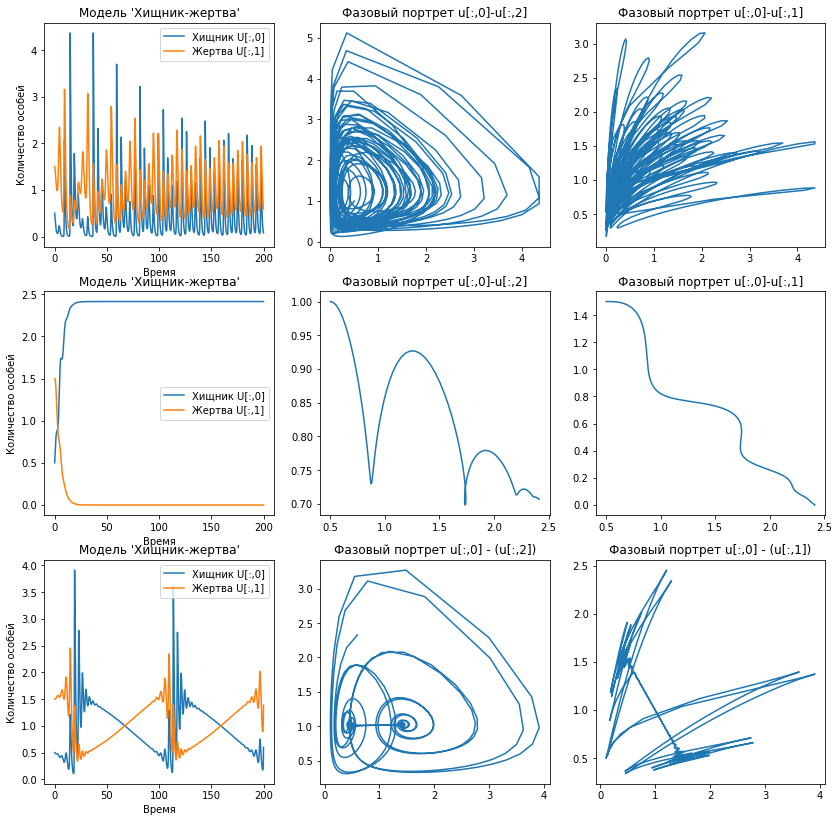

In [4]:
# Без внешнего воздействия (нет параметров, зависящих от t)
def System(U, t):
    # Три участника процесса с нелинейны взаимодействием
    f1 = -a1 * U[0] + gam1 * U[0]*U[2]**2
    f2 = -a2 * U[1] + gam2 * U[1]*U[2]
    f3 = a3 * U[2] - U[1]*U[2] - gam3 * U[0]*U[2]**2 + b3*U[2]**2  # + b3*U[2]**2 - обратная связь
    return [f1, f2, f3]

t = np.arange(0, 200, 0.1)
u0 = [0.5, 1.5, 1]

fig, axs = plt.subplots(3, 3, figsize=(14,14))

a1 = 1.5; a2 = 1; a3 = 1; gam1 = 1; gam2 = 1; gam3 = 1; b3 = 0.5  
u = odeint(System, u0, t)
axs[0, 0].set_title("Модель 'Хищник-жертва'")
axs[0, 0].plot(t, abs(u[:,0]), label='Хищник U[:,0]')
axs[0, 0].plot(t, abs(u[:,1]), label='Жертва U[:,1]')
axs[0, 0].set_xlabel('Время')
axs[0, 0].set_ylabel('Количество особей')
axs[0, 0].legend()
axs[0, 1].set_title("Фазовый портрет u[:,0]-u[:,2]")
axs[0, 1].plot(abs(u[:,0]), abs(u[:,2]))
axs[0, 2].set_title("Фазовый портрет u[:,0]-u[:,1]")
axs[0, 2].plot(abs(u[:,0]), abs(u[:,1]))

a1 = 0.5; a2 = 1; a3 = 1; gam1 = 1; gam2 = 1; gam3 = 1; b3 = 1  # равновесие
u = odeint(System, u0, t)
axs[1, 0].set_title("Модель 'Хищник-жертва'")
axs[1, 0].plot(t, abs(u[:,0]), label='Хищник U[:,0]')
axs[1, 0].plot(t, abs(u[:,1]), label='Жертва U[:,1]')
axs[1, 0].set_xlabel('Время')
axs[1, 0].set_ylabel('Количество особей')
axs[1, 0].legend()
axs[1, 1].set_title("Фазовый портрет u[:,0]-u[:,2]")
axs[1, 1].plot(abs(u[:,0]), abs(u[:,2]))
axs[1, 2].set_title("Фазовый портрет u[:,0]-u[:,1]")
axs[1, 2].plot(abs(u[:,0]), abs(u[:,1]))

a1 = 1.05; a2 = 1; a3 = 1; gam1 = 1; gam2 = 1; gam3 = 1; b3 = 1  # колебательный режим
u = odeint(System, u0, t)
axs[2, 0].set_title("Модель 'Хищник-жертва'")
axs[2, 0].plot(t, abs(u[:,0]), label='Хищник U[:,0]')
axs[2, 0].plot(t, abs(u[:,1]), label='Жертва U[:,1]')
axs[2, 0].set_xlabel('Время')
axs[2, 0].set_ylabel('Количество особей')
axs[2, 0].legend()
axs[2, 1].set_title("Фазовый портрет u[:,0] - (u[:,2])")
axs[2, 1].plot(abs(u[:,0]), abs(u[:,2]))
axs[2, 2].set_title("Фазовый портрет u[:,0] - (u[:,1])")
axs[2, 2].plot(abs(u[:,0]), abs(u[:,1]))

# График 1
# 1. колебательный процесс но без закономерностей в амплитуде. Хаотичная система -> стохастическая -> ДЕТЕРМИНИРОВАННЫЙ ХАОС
# 2. частотная закономерность - нужно смотреть по спектральному анализу

# Выводы
# При наращивании модели (добавляем уровнений) -> явление бифуркации (меняется режим поведения: постоянное-периодическое-хаос)
# Поведение детерминированной системы без каких-либо воздействий может быть сложным

**Самостоятельный пример (+спектральный анализ, автокорреляционный анализ, бифуркационная диаграмма)**

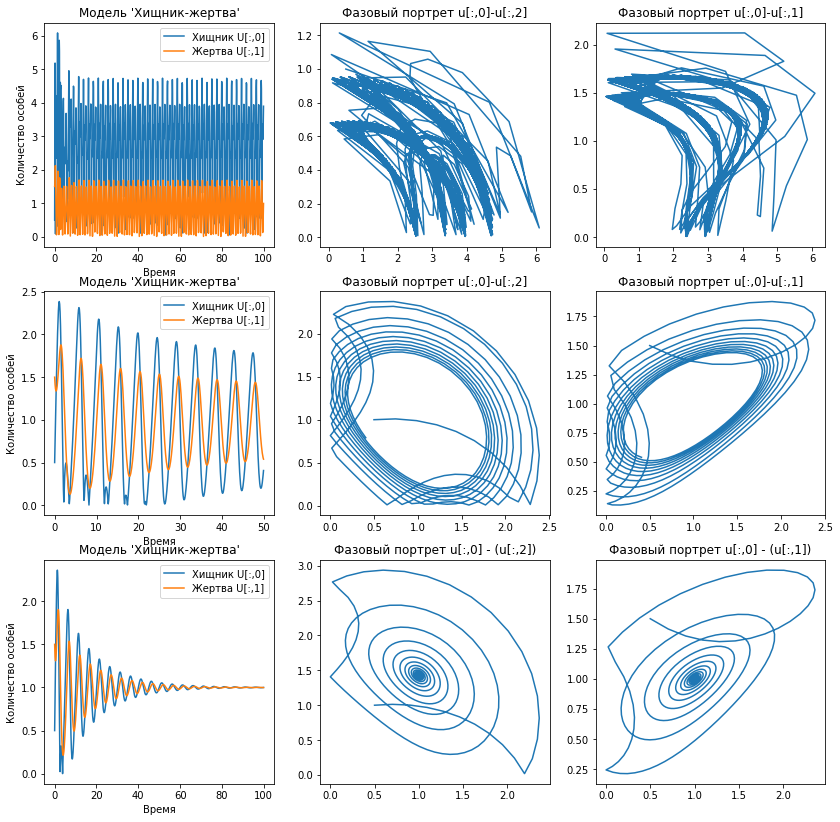

In [5]:
# Самостоятельный пример (интересные зависимости от параметра)
def System(U, t):
    f1 = 1 + a * U[1]*U[2]  # 1 - внешнее воздействие
    f2 = U[0] - U[1]
    f3 = 1 - U[0]*U[1]  # 1 - внешнее воздействие
    return [f1, f2, f3]

fig, axs = plt.subplots(3, 3, figsize=(14,14))

a = 20  # фазовое пространство "заметалось" -> хаотичная система
t = np.arange(0, 100, 0.1)
u0 = [0.5, 1.5, 1]
u = odeint(System, u0, t)
axs[0, 0].set_title("Модель 'Хищник-жертва'")
axs[0, 0].plot(t, abs(u[:,0]), label='Хищник U[:,0]')
axs[0, 0].plot(t, abs(u[:,1]), label='Жертва U[:,1]')
axs[0, 0].set_xlabel('Время')
axs[0, 0].set_ylabel('Количество особей')
axs[0, 0].legend()
axs[0, 1].set_title("Фазовый портрет u[:,0]-u[:,2]")
axs[0, 1].plot(abs(u[:,0]), abs(u[:,2]))
axs[0, 2].set_title("Фазовый портрет u[:,0]-u[:,1]")
axs[0, 2].plot(abs(u[:,0]), abs(u[:,1]))

a = 1  # колебательный режим
t = np.arange(0, 50, 0.1)
u0 = [0.5, 1.5, 1]
u = odeint(System, u0, t)
axs[1, 0].set_title("Модель 'Хищник-жертва'")
axs[1, 0].plot(t, abs(u[:,0]), label='Хищник U[:,0]')
axs[1, 0].plot(t, abs(u[:,1]), label='Жертва U[:,1]')
axs[1, 0].set_xlabel('Время')
axs[1, 0].set_ylabel('Количество особей')
axs[1, 0].legend()
axs[1, 1].set_title("Фазовый портрет u[:,0]-u[:,2]")
axs[1, 1].plot(abs(u[:,0]), abs(u[:,2]))
axs[1, 2].set_title("Фазовый портрет u[:,0]-u[:,1]")
axs[1, 2].plot(abs(u[:,0]), abs(u[:,1]))

a = 0.7  # выход на стационарное поведение
t = np.arange(0, 100, 0.1)
u0 = [0.5, 1.5, 1]
u = odeint(System, u0, t)
axs[2, 0].set_title("Модель 'Хищник-жертва'")
axs[2, 0].plot(t, abs(u[:,0]), label='Хищник U[:,0]')
axs[2, 0].plot(t, abs(u[:,1]), label='Жертва U[:,1]')
axs[2, 0].set_xlabel('Время')
axs[2, 0].set_ylabel('Количество особей')
axs[2, 0].legend()
axs[2, 1].set_title("Фазовый портрет u[:,0] - (u[:,2])")
axs[2, 1].plot(abs(u[:,0]), abs(u[:,2]))
axs[2, 2].set_title("Фазовый портрет u[:,0] - (u[:,1])")
axs[2, 2].plot(abs(u[:,0]), abs(u[:,1]))

**Cпектральный анализ, автокорреляционный анализ**

Text(0.5, 1.0, 'Автокорреляционная функция')

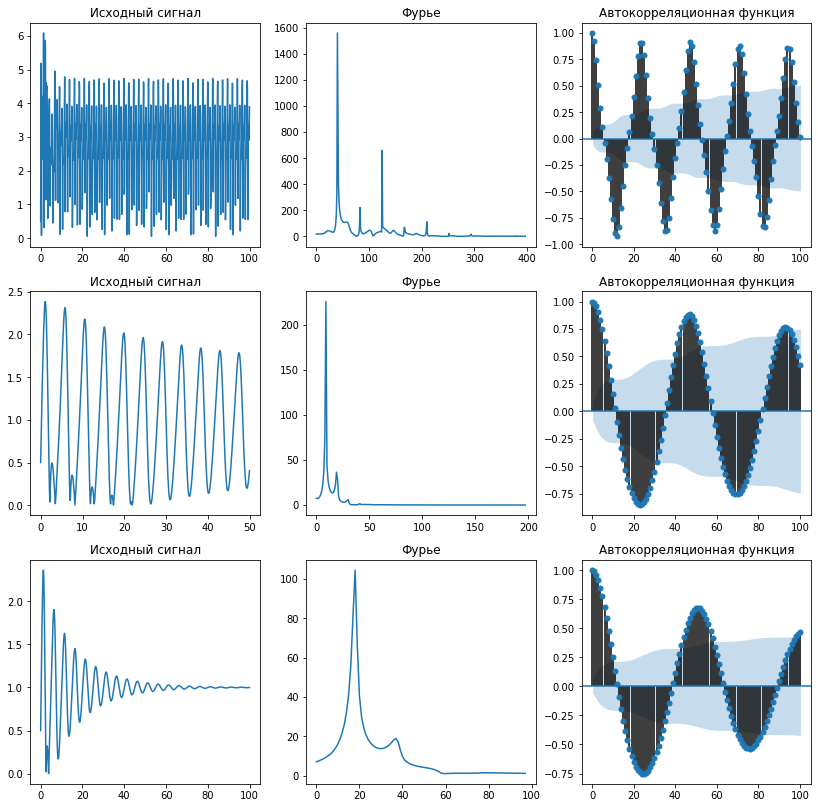

In [6]:
fig, axs = plt.subplots(3, 3, figsize=(14,14))

a = 20  # фазовое пространство "заметалось" -> хаотичная система
t = np.arange(0, 100, 0.1)
u0 = [0.5, 1.5, 1]
u = odeint(System, u0, t)
u_fft = fft.fft(u[:,0])
axs[0, 0].plot(t, abs(u[:,0]))
axs[0, 0].set_title("Исходный сигнал")
axs[0, 1].plot(np.abs(u_fft[2:400]))
axs[0, 1].set_title("Фурье")
sm.graphics.tsa.plot_acf(u[:,0], lags=100, ax=axs[0, 2])
axs[0, 2].set_title("Автокорреляционная функция")

a = 1  # колебательный режим
t = np.arange(0, 50, 0.1)
u0 = [0.5, 1.5, 1]
u = odeint(System, u0, t)
u_fft = fft.fft(u[:,0])
axs[1, 0].plot(t, abs(u[:,0]))
axs[1, 0].set_title("Исходный сигнал")
axs[1, 1].plot(np.abs(u_fft[2:200]))
axs[1, 1].set_title("Фурье")
sm.graphics.tsa.plot_acf(u[:,0], lags=100, ax=axs[1, 2])
axs[1, 2].set_title("Автокорреляционная функция")

a = 0.7  # выход на стационарное поведение
t = np.arange(0, 100, 0.1)
u0 = [0.5, 1.5, 1]
u = odeint(System, u0, t)
u_fft = fft.fft(u[:,0])
axs[2, 0].plot(t, abs(u[:,0]))
axs[2, 0].set_title("Исходный сигнал")
axs[2, 1].plot(np.abs(u_fft[2:100]))
axs[2, 1].set_title("Фурье")
sm.graphics.tsa.plot_acf(u[:,0], lags=100, ax=axs[2, 2])
axs[2, 2].set_title("Автокорреляционная функция")

**Автокорреляционная функция** — зависимость взаимосвязи между функцией (сигналом) и её сдвинутой копией от величины временного сдвига.
      
Если исходная функция строго периодическая, то на графике автокорреляционной функции тоже будет строго периодическая функция. Таким образом, из этого графика можно судить о периодичности исходной функции, а, следовательно, и о её частотных характеристиках.

**Бифуркационная диаграмма**

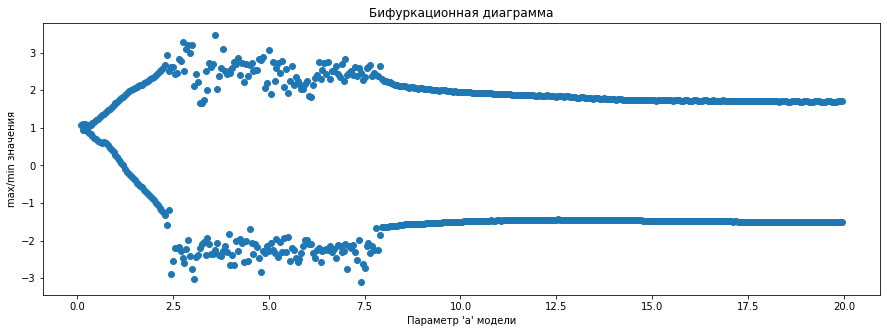

In [7]:
t = np.arange(0, 100, 0.1)
u0 = [0.5, 1.5, 1]
max_min = []

for a_t in np.arange(0, 20, 0.05):
    a = a_t
    u = odeint(System, u0, t)
    # Не затрагиваем точки переходного процесса [70:,..]
    max_min.append([np.min(u[100:,1]),a_t])
    max_min.append([np.max(u[100:,1]),a_t])
    
x = []
y = []
for i in max_min:
    x.append(i[1])
    y.append(i[0])

plt.figure(figsize=(15,5))
plt.title("Бифуркационная диаграмма")
plt.xlabel("Параметр 'a' модели")
plt.ylabel("max/min значения")
plt.plot(x[5:],y[5:], 'o')

**Параметрическая идентификация**

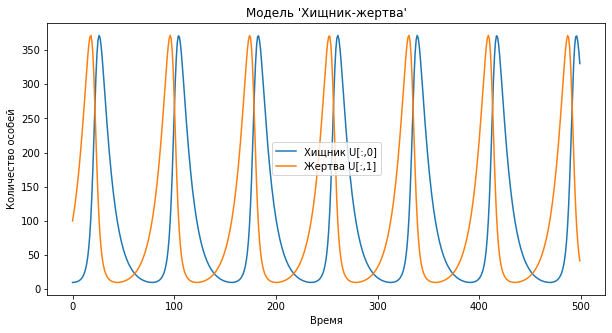

In [8]:
# Модель хищник-жертва
def System(U, t, a1, a2, gam1, gam2, b2=0):
    f1 = -a1 * U[0] + gam1 * U[0]*U[1]
    f2 = a2 * U[1] - gam2 * U[0]*U[1] - b2*U[1]**2
    return [f1, f2]

# БЕЗ СОПРОТИВЛЕНИЯ СРЕДЫ
ideal_params = (0.1, 0.1, 0.001, 0.001)
t = np.arange(0, 500)
u0 = [10, 100]  # 10 - начальное количетсво хищников, 100 - начальное колич жертв
U = odeint(System, u0, t, args=ideal_params)

plt.figure(figsize=(10,5))
plt.title("Модель 'Хищник-жертва'")
plt.plot(t, abs(U[:,0]), label='Хищник U[:,0]')
plt.plot(t, abs(U[:,1]), label='Жертва U[:,1]')
plt.xlabel('Время')
plt.ylabel('Количество особей')
plt.legend()

In [9]:
# Функция ошибки
def error_function(params):
    result = 0
    for i, t_iterate in enumerate(t):
        u_ideal, v_ideal = System(U[i], t_iterate, *ideal_params)
        u_pred, v_pred = System(U[i], t_iterate, *params)
        result = result + ((u_pred - u_ideal)**2 + (v_pred - v_ideal)**2)/2
    return result/len(t)
print("Ошибка на идеальных параметрах", error_function(ideal_params))

Ошибка на идеальных параметрах 0.0


In [10]:
# Минимизация алгоритмом 0-ого порядка (Недлер-Мид)
x0 = [0, 0, 0, 0]
res = minimize(error_function, x0=x0, method='Nelder-Mead')
print("Идеальные параметры", ideal_params)
print("Найденные параметры", res.x, "Ошибка", error_function(res.x))

Идеальные параметры (0.1, 0.1, 0.001, 0.001)
Найденные параметры [0.0999249  0.10001133 0.00099988 0.00099999] Ошибка 4.889679245409436e-05


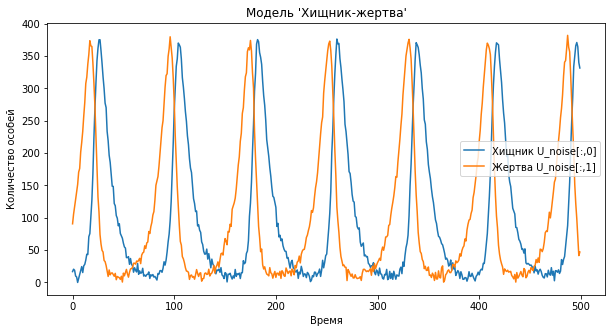

In [11]:
# Добавим шум
U_noise = U + 5 * np.random.randn(*U.shape)
plt.figure(figsize=(10,5))
plt.title("Модель 'Хищник-жертва'")
plt.plot(t, abs(U_noise[:,0]), label='Хищник U_noise[:,0]')
plt.plot(t, abs(U_noise[:,1]), label='Жертва U_noise[:,1]')
plt.xlabel('Время')
plt.ylabel('Количество особей')
plt.legend()

**Минимизация функции нескольких переменных с помощью алгоритма 0-го порядка (Недлера-Мида)**

In [12]:
%%time
# Функция ошибки
def error_function(params):
    result = 0
    for i, t_iterate in enumerate(t):
        u_ideal, v_ideal = System(U[i], t_iterate, *ideal_params)
        u_pred, v_pred = System(U_noise[i], t_iterate, *params)
        result = result + ((u_pred - u_ideal)**2 + (v_pred - v_ideal)**2)/2
    return result/len(t)
print("Ошибка на идеальных параметрах", error_function(ideal_params))

# Минимизация алгоритмом 0-ого порядка (Недлер-Мид)
x0 = [0, 0, 0, 0]
res = minimize(error_function, x0=x0, method='Nelder-Mead')
print("Идеальные параметры", ideal_params)
print("Найденные параметры", res.x, "Ошибка", error_function(res.x))

Ошибка на идеальных параметрах 0.9371796618866842
Идеальные параметры (0.1, 0.1, 0.001, 0.001)
Найденные параметры [0.10048968 0.09936075 0.00100494 0.00099971] Ошибка 0.9298144841635215
Wall time: 1.6 s


**Минимизация функции нескольких переменных с помощью алгоритма сопряженного градиента**

In [13]:
%%time
x0 = [0, 0, 0, 0]
res = minimize(error_function, x0=x0, method='CG')
print("Идеальные параметры", ideal_params)
print("Найденные параметры", res.x, "Ошибка", error_function(res.x))

Идеальные параметры (0.1, 0.1, 0.001, 0.001)
Найденные параметры [0.10044582 0.09935526 0.00100462 0.00099993] Ошибка 0.9297883376196194
Wall time: 2.18 s


**Наблюдатель**

In [14]:
def observer(disp = 0.00001, v0 = 0, restart_P = False):
    # disp - дисперсия (отвечает за гладкость наблюдателя)
    # v0 скорость (коэффициент перед синусом)
    # restart_P - переинициализировать ли матрицу P
    timme = 0
    tau = 0.1
    ntime = 100

    Xt = np.zeros(ntime)
    Vt = np.zeros(ntime)
    Xmeasured = np.zeros(ntime)  # измеренные
    Xexact = np.zeros(ntime)  # точные
    Vexact = np.zeros(ntime)  # точные
    Xtt = np.zeros(ntime)  # для скользящего среднего

    sigma_x = 0.01
    sigma_v = sigma_x/tau
    disp_mes = 0.01
    
    x = 0; v = 0; xe = 0

    Z = np.zeros((2,1))  # вектор состояния 
    Z[0] = x
    Z[1] = v

    P = np.zeros((2,2))  # корреляционная матрица ошибок вектора состояния Z
    P[0,0] = sigma_x**2
    P[1,1] = sigma_v**2

    Pini = P  # для переинициализации матрицы P (очистка мусорных значений)

    Phi = np.eye(2)  # матрица "пропагатора" из уравнения динамики системы Z(k+1)=Phi(Z(k)) + g   где g - случайная компонента
    Phi[0,1] = tau

    G = np.zeros((2,2))  # корреляционная матрица (характеризует случайное воздействие на вектор сосстояний Z)
    G[1,1] = disp

    H = np.zeros((1,2))  # матрица Якоби
    H[0,0] = 1
    H[0,1] = 0

    R = np.eye(1)  # корреляционная матрица из уравнения наблюдателя q=F(Z) + r где r - случайная погрешность измеерения
    R[0,0] = disp_mes

    E = np.eye(2)

    for k in range(0, ntime):
        v = v0 * np.sin(5 * np.pi * k / ntime)
        Vexact[k] = v
        xe = xe + v*tau
        x = xe + 0.05 * np.random.normal()

        if (restart_P and k==ntime/2):
            P = Pini  # переинициализация корреляционной матрицы ошибок вектора состояния

        Zp = Phi@Z
        Pp = Phi@P@Phi.T + Phi@G@Phi.T
        W = H@Pp@H.T
        K = Pp.T@H.T@np.linalg.inv(W+R)
        Z = Zp + K*(x-Zp[0])
        P = (E-np.outer(K,H))@Pp@(E-np.outer(K,H)).T+K@K.T*R

        Xt[k] = Z[0]
        Vt[k] = Z[1]
        Xmeasured[k] = x
        Xexact[k] = xe

        # Смотрим как работает скользящее среднее
        if (k>5):
            Xtt[k]=1/3 * (Xmeasured[k-1] + Xmeasured[k-2] + Xmeasured[k-3])
            
    # Xt - результат наблюдателя
    # Xmeasured - то, что мы мерим 
    # Xexact - то, что есть на самом деле
    # Xtt - результат скользящего среднего
    # Vt - скорость наблюдателя
    # Vexact - скорость на самом деле
    return Xt, Xmeasured, Xexact, Xtt, Vt, Vexact

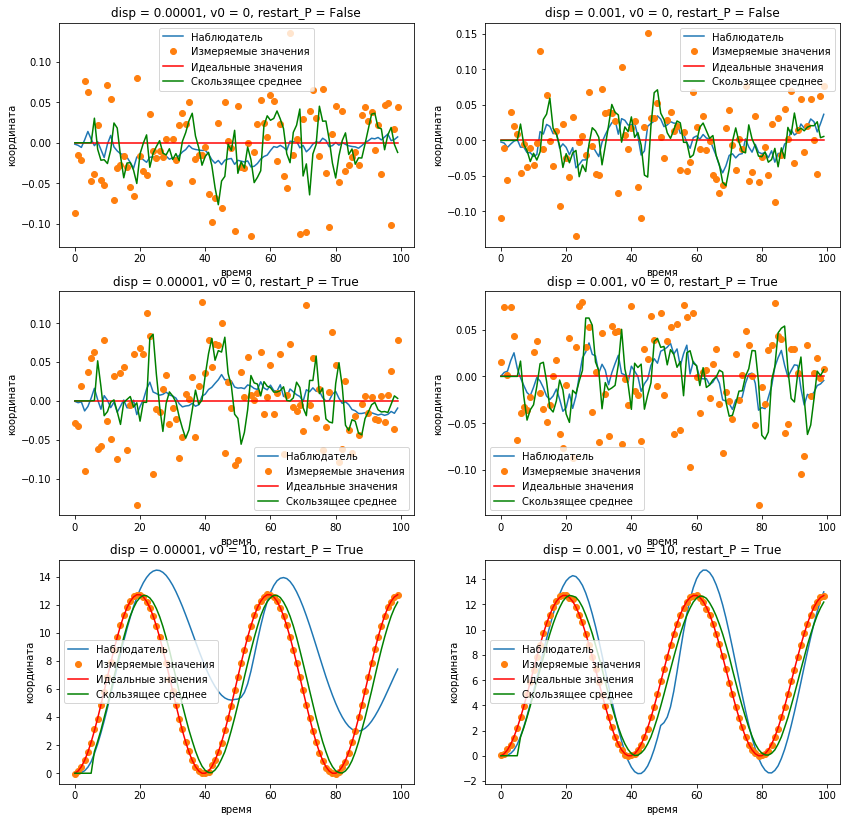

In [15]:
fig, axs = plt.subplots(3, 2, figsize=(14,14))

Xt, Xmeasured, Xexact, Xtt, Vt, Vexact = observer(disp = 0.00001, v0 = 0, restart_P = False)
axs[0, 0].set_title("disp = 0.00001, v0 = 0, restart_P = False")
axs[0, 0].plot(Xt, label='Наблюдатель')
axs[0, 0].plot(Xmeasured, label='Измеряемые значения', marker='o', linestyle='None')
axs[0, 0].plot(Xexact, label='Идеальные значения', color='red')
axs[0, 0].plot(Xtt, label='Скользящее среднее', color='green')
axs[0, 0].set_xlabel('время')
axs[0, 0].set_ylabel('координата')
axs[0, 0].legend()

# увеличиваем дисперцсию
Xt, Xmeasured, Xexact, Xtt, Vt, Vexact = observer(disp = 0.001, v0 = 0, restart_P = False)
axs[0, 1].set_title("disp = 0.001, v0 = 0, restart_P = False")
axs[0, 1].plot(Xt, label='Наблюдатель')
axs[0, 1].plot(Xmeasured, label='Измеряемые значения', marker='o', linestyle='None')
axs[0, 1].plot(Xexact, label='Идеальные значения', color='red')
axs[0, 1].plot(Xtt, label='Скользящее среднее', color='green')
axs[0, 1].set_xlabel('время')
axs[0, 1].set_ylabel('координата')
axs[0, 1].legend()

# включаем переинициализацию P
Xt, Xmeasured, Xexact, Xtt, Vt, Vexact = observer(disp = 0.00001, v0 = 0, restart_P = True)
axs[1, 0].set_title("disp = 0.00001, v0 = 0, restart_P = True")
axs[1, 0].plot(Xt, label='Наблюдатель')
axs[1, 0].plot(Xmeasured, label='Измеряемые значения', marker='o', linestyle='None')
axs[1, 0].plot(Xexact, label='Идеальные значения', color='red')
axs[1, 0].plot(Xtt, label='Скользящее среднее', color='green')
axs[1, 0].set_xlabel('время')
axs[1, 0].set_ylabel('координата')
axs[1, 0].legend()

# включаем переинициализацию P
Xt, Xmeasured, Xexact, Xtt, Vt, Vexact = observer(disp = 0.001, v0 = 0, restart_P = True)
axs[1, 1].set_title("disp = 0.001, v0 = 0, restart_P = True")
axs[1, 1].plot(Xt, label='Наблюдатель')
axs[1, 1].plot(Xmeasured, label='Измеряемые значения', marker='o', linestyle='None')
axs[1, 1].plot(Xexact, label='Идеальные значения', color='red')
axs[1, 1].plot(Xtt, label='Скользящее среднее', color='green')
axs[1, 1].set_xlabel('время')
axs[1, 1].set_ylabel('координата')
axs[1, 1].legend()

# синусоидальная скорость
Xt, Xmeasured, Xexact, Xtt, Vt, Vexact = observer(disp = 0.00001, v0 = 10, restart_P = True)
axs[2, 0].set_title("disp = 0.00001, v0 = 10, restart_P = True")
axs[2, 0].plot(Xt, label='Наблюдатель')
axs[2, 0].plot(Xmeasured, label='Измеряемые значения', marker='o', linestyle='None')
axs[2, 0].plot(Xexact, label='Идеальные значения', color='red')
axs[2, 0].plot(Xtt, label='Скользящее среднее', color='green')
axs[2, 0].set_xlabel('время')
axs[2, 0].set_ylabel('координата')
axs[2, 0].legend()

# синусоидальная скорость
Xt, Xmeasured, Xexact, Xtt, Vt, Vexact = observer(disp = 0.001, v0 = 10, restart_P = True)
axs[2, 1].set_title("disp = 0.001, v0 = 10, restart_P = True")
axs[2, 1].plot(Xt, label='Наблюдатель')
axs[2, 1].plot(Xmeasured, label='Измеряемые значения', marker='o', linestyle='None')
axs[2, 1].plot(Xexact, label='Идеальные значения', color='red')
axs[2, 1].plot(Xtt, label='Скользящее среднее', color='green')
axs[2, 1].set_xlabel('время')
axs[2, 1].set_ylabel('координата')
axs[2, 1].legend()

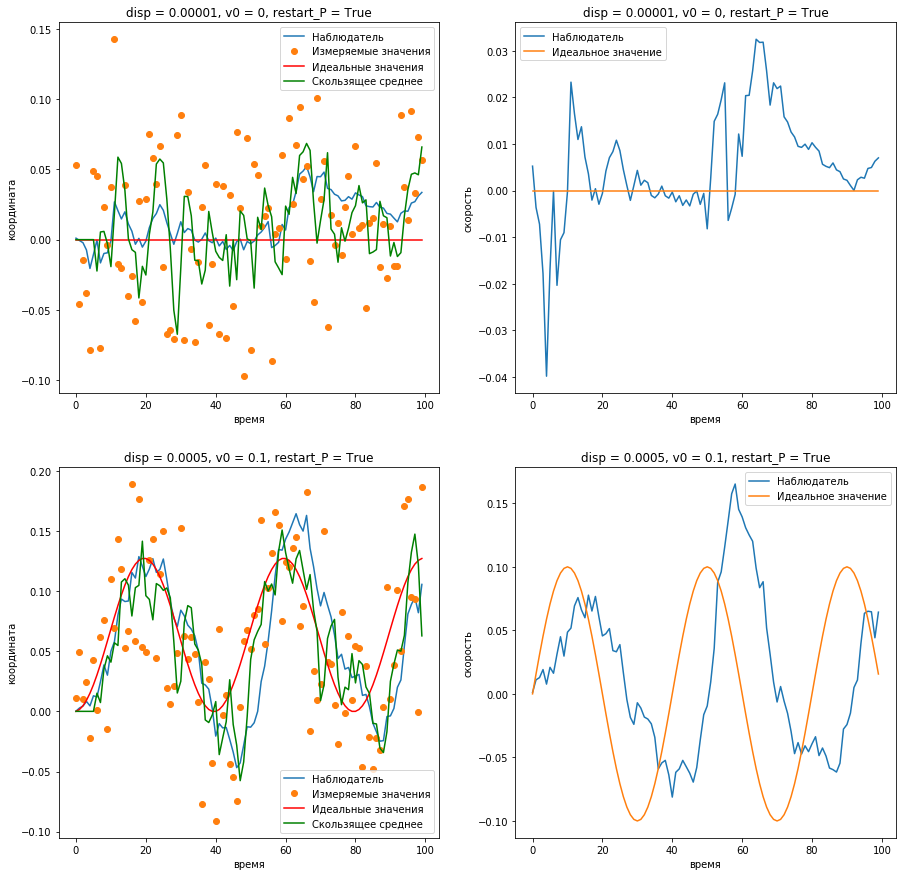

In [16]:
# Скорость
fig, axs = plt.subplots(2, 2, figsize=(15,15))

Xt, Xmeasured, Xexact, Xtt, Vt, Vexact = observer(disp = 0.00001, v0 = 0, restart_P = True)
axs[0, 0].set_title("disp = 0.00001, v0 = 0, restart_P = True")
axs[0, 0].plot(Xt, label='Наблюдатель')
axs[0, 0].plot(Xmeasured, label='Измеряемые значения', marker='o', linestyle='None')
axs[0, 0].plot(Xexact, label='Идеальные значения', color='red')
axs[0, 0].plot(Xtt, label='Скользящее среднее', color='green')
axs[0, 0].set_xlabel('время')
axs[0, 0].set_ylabel('координата')
axs[0, 0].legend()

axs[0, 1].set_title("disp = 0.00001, v0 = 0, restart_P = True")
axs[0, 1].plot(Vt, label='Наблюдатель')
axs[0, 1].plot(Vexact, label='Идеальное значение')
axs[0, 1].set_xlabel('время')
axs[0, 1].set_ylabel('скорость')
axs[0, 1].legend()


Xt, Xmeasured, Xexact, Xtt, Vt, Vexact = observer(disp = 0.0005, v0 = 0.1, restart_P = True)
axs[1, 0].set_title("disp = 0.0005, v0 = 0.1, restart_P = True")
axs[1, 0].plot(Xt, label='Наблюдатель')
axs[1, 0].plot(Xmeasured, label='Измеряемые значения', marker='o', linestyle='None')
axs[1, 0].plot(Xexact, label='Идеальные значения', color='red')
axs[1, 0].plot(Xtt, label='Скользящее среднее', color='green')
axs[1, 0].set_xlabel('время')
axs[1, 0].set_ylabel('координата')
axs[1, 0].legend()

axs[1, 1].set_title("disp = 0.0005, v0 = 0.1, restart_P = True")
axs[1, 1].plot(Vt, label='Наблюдатель')
axs[1, 1].plot(Vexact, label='Идеальное значение')
axs[1, 1].set_xlabel('время')
axs[1, 1].set_ylabel('скорость')
axs[1, 1].legend()

**Ядерное сглаживание, Полиномом, Сплайны**

Коэффициенты полинома [-1.95779289e-02  6.41730453e-03  5.51631301e-04 -2.44560206e-05]


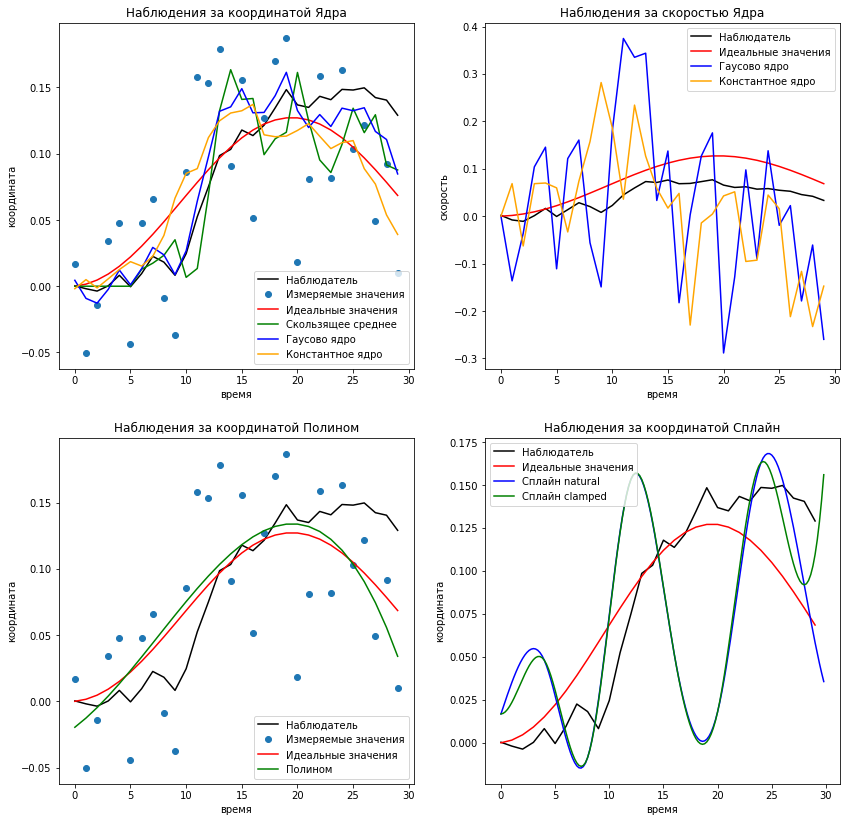

In [17]:
# Полу-Гаусово ядро, чтобы не могли заглядывать вперед
def KernelGauss(x, c, s):
    w = 0
    if (x>=0):
        w = 2/s * (2*np.pi) ** (-0.5) * np.exp(-(x-c)**2/2/s**2)
    return w

# Ядро - прямоугольник (константа на ограниченном промежутке)
def KernelConst(x, s):
    w = 0
    if (abs(x) <= s):
        w = 1 / (2*s + 1)
    return w

Xt, Xmeasured, Xexact, Xtt, Vt, Vexact = observer(disp = 0.00005, v0 = 0.1, restart_P = True)
length = 30
Xt = Xt[:length]
Xmeasured = Xmeasured[:length]
Xexact = Xexact[:length]
Xtt = Xtt[:length]
Vt = Vt[:length]
Vexact = Vexact[:length]
tau = 0.1

n = len(Xmeasured)
observer_by_kernel_x = np.zeros(n)
observer_by_kernel_v = np.zeros(n)
observer_by_const_x = np.zeros(n)
observer_by_const_v = np.zeros(n)

for i in range(0, n):
    observer_by_kernel_x[i] = 0
    observer_by_const_x[i] = 0
    for k in range(0, n):
        observer_by_kernel_x[i] = observer_by_kernel_x[i] + Xmeasured[k]*KernelGauss((i-k), 0, 3)
        observer_by_const_x[i] = observer_by_const_x[i] + Xmeasured[k]*KernelConst((i-k), 3)
    if(i>0):
        observer_by_kernel_v[i] = (observer_by_kernel_x[i] - observer_by_kernel_x[i-1])/tau
        observer_by_const_v[i] = (observer_by_const_x[i] - observer_by_const_x[i-1])/tau
        
        
# Аппроксимация полиномом
m = 3  # степень полинома
def SqLeastReg (x, y, m, alpha): # Метод наименьших квадратов с регуляризацией
    global G
    n = len(x)
    Phi = np.zeros ((n,m+1))
    for k in range (0, m+1):
        Phi[:,k] = BasicFunctions (k, x)
    PhiT = Phi.T
    
    RegAlpha = np.eye (m+1) * alpha
        
    G = PhiT @ Phi + RegAlpha 
    z = PhiT @ y
    a = np.linalg.solve(G, z)

    return a

def BasicFunctions (num, x):
    PhiFun = x**num
    return PhiFun

x = np.arange(0, len(Xmeasured))
y = Xmeasured
PolynomCoefs = SqLeastReg (x, y, m, 0.001)
print ('Коэффициенты полинома', PolynomCoefs)

PolynomValue = np.zeros(len(x))
for i in range (0, m+1):
    PolynomValue += PolynomCoefs[i]*x**i
    
    
    
# Сплайн
x = np.arange(0, len(Xmeasured))[::4]
y = Xmeasured[::4]
x_d = np.arange (0, len(Xmeasured), 0.2)
cubic = interp.CubicSpline(x, y, bc_type='natural') 
cubic2 = interp.CubicSpline(x, y, bc_type='clamped') 



fig, axs = plt.subplots(2, 2, figsize=(14, 14))
axs[0, 0].set_title("Наблюдения за координатой Ядра")
axs[0, 0].plot(Xt, label='Наблюдатель', color='black')
axs[0, 0].plot(Xmeasured, label='Измеряемые значения', marker='o', linestyle='None')
axs[0, 0].plot(Xexact, label='Идеальные значения', color='red')
axs[0, 0].plot(Xtt, label='Скользящее среднее', color='green')
axs[0, 0].plot(observer_by_kernel_x, label='Гаусово ядро', color='blue')
axs[0, 0].plot(observer_by_const_x, label='Константное ядро', color='orange')
axs[0, 0].set_xlabel('время')
axs[0, 0].set_ylabel('координата')
axs[0, 0].legend()

axs[0, 1].set_title("Наблюдения за скоростью Ядра")
axs[0, 1].plot(Vt, label='Наблюдатель', color='black')
axs[0, 1].plot(Xexact, label='Идеальные значения', color='red')
axs[0, 1].plot(observer_by_kernel_v, label='Гаусово ядро', color='blue')
axs[0, 1].plot(observer_by_const_v, label='Константное ядро', color='orange')
axs[0, 1].set_xlabel('время')
axs[0, 1].set_ylabel('скорость')
axs[0, 1].legend()

axs[1, 0].set_title("Наблюдения за координатой Полином")
axs[1, 0].plot(Xt, label='Наблюдатель', color='black')
axs[1, 0].plot(Xmeasured, label='Измеряемые значения', marker='o', linestyle='None')
axs[1, 0].plot(Xexact, label='Идеальные значения', color='red')
axs[1, 0].plot(PolynomValue, label='Полином', color='green')
axs[1, 0].set_xlabel('время')
axs[1, 0].set_ylabel('координата')
axs[1, 0].legend()

axs[1, 1].set_title("Наблюдения за координатой Сплайн")
axs[1, 1].plot(Xt, label='Наблюдатель', color='black')
axs[1, 1].plot(Xexact, label='Идеальные значения', color='red')
axs[1, 1].plot(x_d, cubic(x_d), label='Сплайн natural', color='blue')
axs[1, 1].plot(x_d, cubic2(x_d), label='Сплайн clamped', color='green')
axs[1, 1].set_xlabel('время')
axs[1, 1].set_ylabel('координата')
axs[1, 1].legend()

**Наблюдатель в двумерном пространстве (Версия 1 - на двух "вышках")**

In [18]:
def observerXY(disp = 0.00001, v0 = 0, restart_P = False):
    # disp - дисперсия (отвечает за гладкость наблюдателя)
    # v0 скорость (коэффициент перед синусом)
    # restart_P - переинициализировать ли матрицу P
    timme = 0
    tau = 0.1
    ntime = 100

    Xt = np.zeros(ntime)
    Yt = np.zeros(ntime)
    Vtx = np.zeros(ntime)
    Vty = np.zeros(ntime)
    
    Xmeasured = np.zeros(ntime)  # измеренные
    Ymeasured = np.zeros(ntime)  # измеренные
    Xexact = np.zeros(ntime)  # точные
    Yexact = np.zeros(ntime)  # точные
    
    Vexactx = np.zeros(ntime)  # точные
    Vexacty = np.zeros(ntime)  # точные

    sigma_x = 0.01
    sigma_y = 0.01
    sigma_vx = sigma_x/tau
    sigma_vy = sigma_y/tau
    disp_mes = 0.01
    
    x = 0; vx = 0; xe = 0
    y = 0; vy = 0; ye = 0

    Z = np.zeros((4,1))  # вектор состояния 
    Z[0] = x
    Z[1] = vx
    Z[2] = y
    Z[3] = vy

    P = np.zeros((4,4))  # корреляционная матрица ошибок вектора состояния Z
    P[0,0] = sigma_x**2
    P[1,1] = sigma_vx**2
    P[2,2] = sigma_y**2
    P[3,3] = sigma_vy**2

    Pini = P  # для переинициализации матрицы P (очистка мусорных значений)

    Phi = np.eye(4)  # матрица "пропагатора" из уравнения динамики системы Z(k+1)=Phi(Z(k)) + g   где g - случайная компонента
    Phi[0,2] = tau
    Phi[1,3] = tau

    G = np.zeros((4,4))  # корреляционная матрица (характеризует случайное воздействие на вектор сосстояний Z)
    G[3,3] = disp
    G[1,1] = disp

    H = np.zeros((2,4))  # матрица Якоб. 2 Источника (станции) 
    H[0,0] = 2; H[0,1] = 2; H[0,2] = 0; H[0,3] = 0
    H[1,0] = 2; H[1,1] = 2; H[1,2] = 0; H[1,3] = 0

    R = np.zeros((2,2))  # корреляционная матрица из уравнения наблюдателя q=F(Z) + r где r - случайная погрешность измеерения
    R[0,0] = disp_mes; R[1,1] = disp_mes; #R[2,0] = disp_mes; R[3,1] = disp_mes

    E = np.eye(4)

    for k in range(0, ntime):
        vx = v0 * np.sin(3 * np.pi * k / ntime)
        vy = v0 * np.sin(5 * np.pi * k / ntime)
        
        xe = xe + vx*tau
        x = xe + 0.1 * np.random.normal()
        ye = ye + vy*tau
        y = ye + 0.1 * np.random.normal()

        if (restart_P and k==ntime/2):
            P = Pini  # переинициализация корреляционной матрицы ошибок вектора состояния

        Zp = Phi@Z
        Pp = Phi@P@Phi.T + Phi@G@Phi.T
        W = H@Pp@H.T
        K = Pp.T@H.T@np.linalg.inv(W+R)
        Z[0] = Zp[0] + K[0, 0]*(x-Zp[0]) + K[1, 0]*(x-Zp[0])
        Z[1] = Zp[1] + K[3, 0]*(vx-Zp[1]) # + K[2, 0]*(vx-Zp[1])
        Z[2] = Zp[2] + K[0, 1]*(y-Zp[2]) + K[1, 1]*(y-Zp[2])
        Z[3] = Zp[3] + K[3, 1]*(vy-Zp[3]) # + K[2, 1]*(vy-Zp[3])
        
        R_temp = np.zeros((4,4))
        R_temp[0,0] = R[0,0]; R_temp[1,1] = R[1,0]; R_temp[2,2] = R[0,1]; R_temp[3,3] = R[1,0]
        P = (E-np.outer(K,H)[:4,:4]) @Pp @ (E-np.outer(K,H)[:4,:4]).T + (K@K.T) * R_temp
        Xt[k] = Z[0]
        Vtx[k] = Z[1]
        Yt[k] = Z[2]
        Vty[k] = Z[3]
        Xmeasured[k] = x
        Ymeasured[k] = y
        Xexact[k] = xe
        Yexact[k] = ye
        Vexactx[k] = vx
        Vexacty[k] = vy  
        
    # Xt - результат наблюдателя x
    # Yt - результат наблюдателя y
    
    # Xmeasured - то, что мы мерим по x
    # Ymeasured - то, что мы мерим по Y
    
    # Xexact - то, что есть на самом деле по x  
    # Yexact - то, что есть на самом деле по y
    
    # Vtx - скорость наблюдателя по x
    # Vty - скорость наблюдателя по y
    
    # Vexactx - скорость на самом деле по x
    # Vexacty - скорость на самом деле по y
    return Xt, Yt, Xmeasured, Ymeasured, Xexact, Yexact, Vtx, Vty, Vexactx, Vexacty

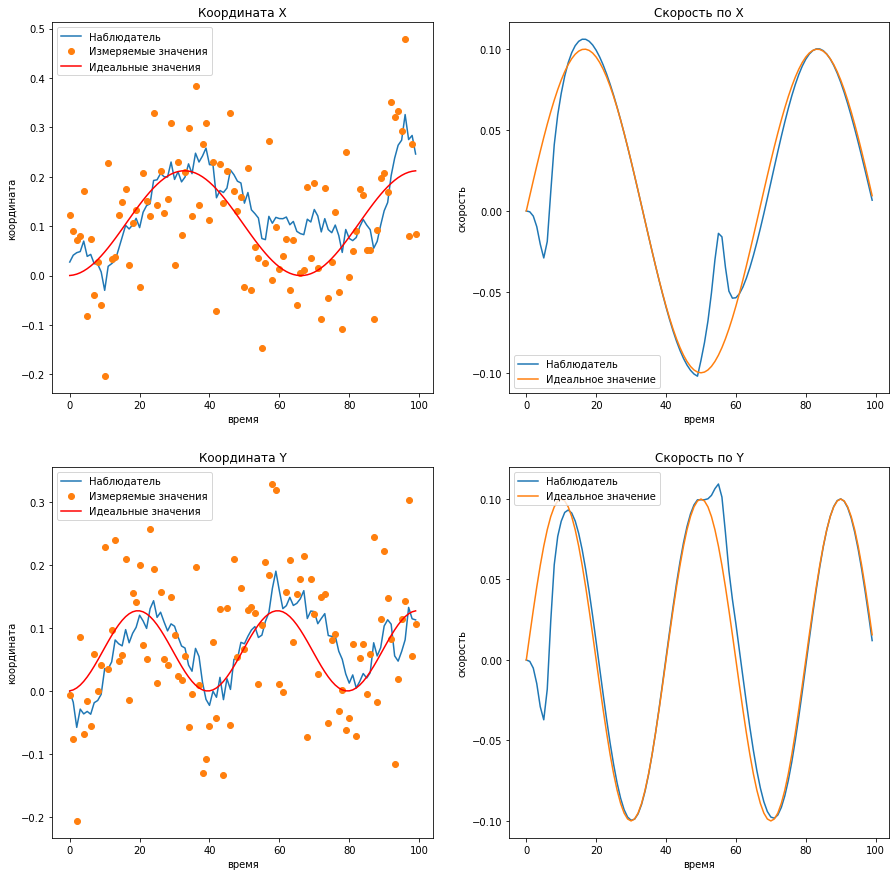

In [19]:
Xt, Yt, Xmeasured, Ymeasured, Xexact, Yexact, Vtx, Vty, Vexactx, Vexacty = observerXY(disp = 0.0001, v0 = 0.1, restart_P = True)

fig, axs = plt.subplots(2, 2, figsize=(15,15))

axs[0, 0].set_title("Координата X")
axs[0, 0].plot(Xt, label='Наблюдатель')
axs[0, 0].plot(Xmeasured, label='Измеряемые значения', marker='o', linestyle='None')
axs[0, 0].plot(Xexact, label='Идеальные значения', color='red')
axs[0, 0].set_xlabel('время')
axs[0, 0].set_ylabel('координата')
axs[0, 0].legend()

axs[0, 1].set_title("Скорость по X")
axs[0, 1].plot(Vtx, label='Наблюдатель')
axs[0, 1].plot(Vexactx, label='Идеальное значение')
axs[0, 1].set_xlabel('время')
axs[0, 1].set_ylabel('скорость')
axs[0, 1].legend()

axs[1, 0].set_title("Координата Y")
axs[1, 0].plot(Yt, label='Наблюдатель')
axs[1, 0].plot(Ymeasured, label='Измеряемые значения', marker='o', linestyle='None')
axs[1, 0].plot(Yexact, label='Идеальные значения', color='red')
axs[1, 0].set_xlabel('время')
axs[1, 0].set_ylabel('координата')
axs[1, 0].legend()

axs[1, 1].set_title("Скорость по Y")
axs[1, 1].plot(Vty, label='Наблюдатель')
axs[1, 1].plot(Vexacty, label='Идеальное значение')
axs[1, 1].set_xlabel('время')
axs[1, 1].set_ylabel('скорость')
axs[1, 1].legend()

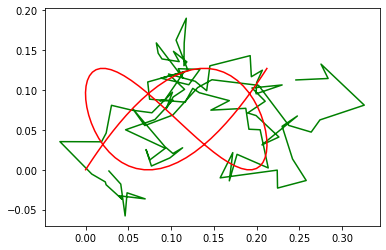

In [20]:
plt.plot(Xt, Yt, color='green')
plt.plot(Xexact, Yexact, color='red')

**Наблюдатель в двумерном пространстве (Версия 2)**

In [21]:
def observerXY_2(m = 2, disp = 0.00001, v0 = 0, restart_P = False):
    # disp - дисперсия (отвечает за гладкость наблюдателя)
    # v0 скорость (коэффициент перед синусом)
    # restart_P - переинициализировать ли матрицу P
    timme = 0
    tau = 0.1
    ntime = 100

    Xt = np.zeros(ntime)
    Yt = np.zeros(ntime)
    Vtx = np.zeros(ntime)
    Vty = np.zeros(ntime)
    
    Xmeasured = np.zeros(ntime)  # измеренные
    Ymeasured = np.zeros(ntime)  # измеренные
    Xexact = np.zeros(ntime)  # точные
    Yexact = np.zeros(ntime)  # точные
    
    Vexactx = np.zeros(ntime)  # точные
    Vexacty = np.zeros(ntime)  # точные

    sigma_x = 0.01
    sigma_y = 0.01
    sigma_vx = sigma_x/tau
    sigma_vy = sigma_y/tau
    disp_mes = 0.01
    
    x = 0; vx = 0; xe = 0
    y = 0; vy = 0; ye = 0

    Z = np.zeros((4,1))  # вектор состояния 
    Z[0] = x
    Z[1] = vx
    Z[2] = y
    Z[3] = vy

    P = np.zeros((4,4))  # корреляционная матрица ошибок вектора состояния Z
    P[0,0] = sigma_x**2
    P[1,1] = sigma_vx**2
    P[2,2] = sigma_y**2
    P[3,3] = sigma_vy**2

    Pini = P  # для переинициализации матрицы P (очистка мусорных значений)

    Phi = np.eye(4)  # матрица "пропагатора" из уравнения динамики системы Z(k+1)=Phi(Z(k)) + g   где g - случайная компонента
    Phi[0,1] = tau; 
    Phi[1,3] = tau/2;
    Phi[2,1] = tau*1.5;

    G = np.zeros((4,4))  # корреляционная матрица (характеризует случайное воздействие на вектор сосстояний Z)
    G[3,3] = disp
    G[0,0] = disp
    G[2,2] = disp
    G[1,1] = disp

    H = np.zeros((m, 4))  # матрица Якоб. 2 Источника (станции) 
    for i in range(0, m):
        H[i,0] = 2
        H[i,1] = 2

    R = np.eye(m)  # корреляционная матрица из уравнения наблюдателя q=F(Z) + r где r - случайная погрешность измеерения
    for l in range (0,m):
        R[l,l] = disp_mes

    E = np.eye(4)
    W = np.zeros((m,m))
    K = np.zeros((4,m))
        
    for k in range(0, ntime):
        vx = v0 * np.sin(10 * np.pi * k / ntime)
        vy = v0 * np.sin(3 * np.pi * k / ntime)
        
        xe = xe + vx*tau
        x = xe + 0.1 * np.random.normal()
        ye = ye + vy*tau
        y = ye + 0.1 * np.random.normal()

        if (restart_P and k==ntime/2):
            P = Pini  # переинициализация корреляционной матрицы ошибок вектора состояния

        Zp = Phi@Z
        Pp = Phi@P@Phi.T + Phi@G@Phi.T
        W = H@Pp@H.T
        K = Pp.T@H.T@np.linalg.inv(W+R)
        Z[0] = Zp[0] + K[0, 0]*(x-Zp[0]) + K[0, 1]*(x-Zp[0])
        Z[1] = Zp[1] + K[1, 0]*(vx-Zp[1])+ K[1, 1]*(vx-Zp[1])
        Z[2] = Zp[2] + K[2, 0]*(y-Zp[2]) + K[2, 1]*(y-Zp[2])
        Z[3] = Zp[3] + K[3, 0]*(vy-Zp[3])+ K[3, 1]*(vy-Zp[3])
        P = (E-K@H)@Pp@(E-K@H).T+K@R@K.T
        
        Xt[k] = Z[0]
        Vtx[k] = Z[1]
        Yt[k] = Z[2]
        Vty[k] = Z[3]
        Xmeasured[k] = x
        Ymeasured[k] = y
        Xexact[k] = xe
        Yexact[k] = ye
        Vexactx[k] = vx
        Vexacty[k] = vy  
        
    # Xt - результат наблюдателя x
    # Yt - результат наблюдателя y
    
    # Xmeasured - то, что мы мерим по x
    # Ymeasured - то, что мы мерим по Y
    
    # Xexact - то, что есть на самом деле по x  
    # Yexact - то, что есть на самом деле по y
    
    # Vtx - скорость наблюдателя по x
    # Vty - скорость наблюдателя по y
    
    # Vexactx - скорость на самом деле по x
    # Vexacty - скорость на самом деле по y
    return Xt, Yt, Xmeasured, Ymeasured, Xexact, Yexact, Vtx, Vty, Vexactx, Vexacty


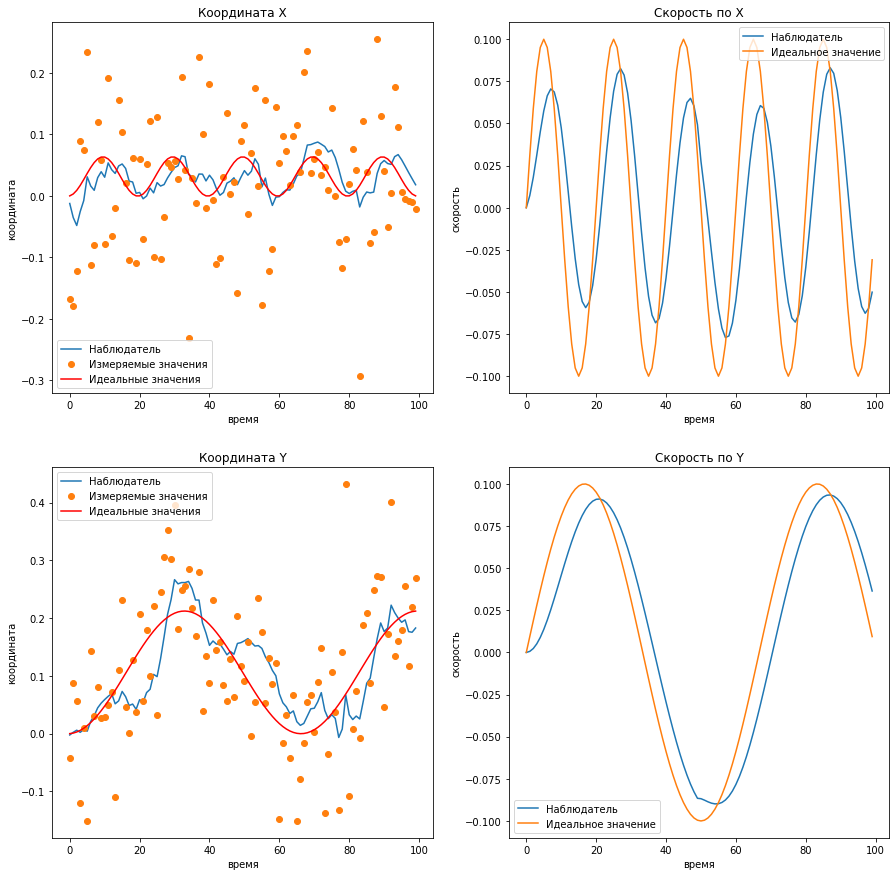

In [22]:
Xt, Yt, Xmeasured, Ymeasured, Xexact, Yexact, Vtx, Vty, Vexactx, Vexacty = observerXY_2(m=2, disp = 0.001, v0 = 0.1, restart_P = True)
fig, axs = plt.subplots(2, 2, figsize=(15,15))

axs[0, 0].set_title("Координата X")
axs[0, 0].plot(Xt, label='Наблюдатель')
axs[0, 0].plot(Xmeasured, label='Измеряемые значения', marker='o', linestyle='None')
axs[0, 0].plot(Xexact, label='Идеальные значения', color='red')
axs[0, 0].set_xlabel('время')
axs[0, 0].set_ylabel('координата')
axs[0, 0].legend()

axs[0, 1].set_title("Скорость по X")
axs[0, 1].plot(Vtx, label='Наблюдатель')
axs[0, 1].plot(Vexactx, label='Идеальное значение')
axs[0, 1].set_xlabel('время')
axs[0, 1].set_ylabel('скорость')
axs[0, 1].legend()

axs[1, 0].set_title("Координата Y")
axs[1, 0].plot(Yt, label='Наблюдатель')
axs[1, 0].plot(Ymeasured, label='Измеряемые значения', marker='o', linestyle='None')
axs[1, 0].plot(Yexact, label='Идеальные значения', color='red')
axs[1, 0].set_xlabel('время')
axs[1, 0].set_ylabel('координата')
axs[1, 0].legend()

axs[1, 1].set_title("Скорость по Y")
axs[1, 1].plot(Vty, label='Наблюдатель')
axs[1, 1].plot(Vexacty, label='Идеальное значение')
axs[1, 1].set_xlabel('время')
axs[1, 1].set_ylabel('скорость')
axs[1, 1].legend()

In [23]:
k = np.arange(m) +5
k

array([5, 6, 7])

In [41]:
def observerXY_2(m = 2, disp = 0.00001, v0 = 0, restart_P = False):
    # disp - дисперсия (отвечает за гладкость наблюдателя)
    # v0 скорость (коэффициент перед синусом)
    # restart_P - переинициализировать ли матрицу P
    timme = 0
    tau = 0.1
    ntime = 100

    Xt = np.zeros(ntime)
    Yt = np.zeros(ntime)
    Vtx = np.zeros(ntime)
    Vty = np.zeros(ntime)
    
    Xmeasured = np.zeros(ntime)  # измеренные
    Ymeasured = np.zeros(ntime)  # измеренные
    Xexact = np.zeros(ntime)  # точные
    Yexact = np.zeros(ntime)  # точные
    
    Vexactx = np.zeros(ntime)  # точные
    Vexacty = np.zeros(ntime)  # точные

    sigma_x = 0.01
    sigma_y = 0.01
    sigma_vx = sigma_x/tau
    sigma_vy = sigma_y/tau
    disp_mes = 0.01
    
    x = 0; vx = 0; xe = 0
    y = 0; vy = 0; ye = 0

    Z = np.zeros((4,1))  # вектор состояния 
    Z[0] = x
    Z[1] = y
    Z[2] = vx
    Z[3] = vy

    P = np.zeros((4,4))  # корреляционная матрица ошибок вектора состояния Z
    P[0,0] = sigma_x**2
    P[1,1] = sigma_vx**2
    P[2,2] = sigma_y**2
    P[3,3] = sigma_vy**2

    Pini = P  # для переинициализации матрицы P (очистка мусорных значений)

    Phi = np.eye(4)  # матрица "пропагатора" из уравнения динамики системы Z(k+1)=Phi(Z(k)) + g   где g - случайная компонента
    Phi[0,2] = tau; 
    Phi[1,3] = tau;

    G = np.zeros((4,4))  # корреляционная матрица (характеризует случайное воздействие на вектор сосстояний Z)
    G[3,3] = disp
    #G[0,0] = disp
    #G[2,2] = disp
    G[2,2] = disp

    H = np.zeros((m, 4))  # матрица Якоб. 2 Источника (станции) 

    R = np.eye(m)  # корреляционная матрица из уравнения наблюдателя q=F(Z) + r где r - случайная погрешность измеерения
    for l in range (0,m):
        R[l,l] = disp_mes

    E = np.eye(4)
    W = np.zeros((m,m))
    K = np.zeros((4,m))
    
    coordinata_x_vushka = np.arange(m)
    coordinata_y_vushka = np.arange(m) + 5
    
    K_0_mean = 0;
    K_1_mean = 0;
    K_2_mean = 0;
    K_3_mean = 0;
        
    for k in range(0, ntime):
        vx = v0 * np.sin(3 * np.pi * k / ntime)
        vy = v0 * np.cos(3 * np.pi * k / ntime)
        
        xe = xe + vx*tau
        x = xe + 0.1 * np.random.normal()
        ye = ye + vy*tau
        y = ye + 0.1 * np.random.normal()
        
        for i in range(0, m):
            H[i,0] = (xe - coordinata_x_vushka[i]) / (np.sqrt((xe - coordinata_x_vushka[i])**2 + (ye - coordinata_y_vushka[i])**2))
            H[i,1] = (ye - coordinata_y_vushka[i]) / (np.sqrt((xe - coordinata_x_vushka[i])**2 + (ye - coordinata_y_vushka[i])**2))

        if (restart_P and k==ntime/2):
            P = Pini  # переинициализация корреляционной матрицы ошибок вектора состояния

        Zp = Phi@Z
        Pp = Phi@P@Phi.T + Phi@G@Phi.T
        W = H@Pp@H.T
        K = Pp.T@H.T@np.linalg.inv(W+R)
        
        
        for l in range(m):
            K_0_mean += K[0, l]
            K_1_mean += K[1, l]
            K_2_mean += K[2, l]
            K_3_mean += K[3, l]
        K_0_mean = K_0_mean / m
        K_1_mean = K_1_mean / m
        K_2_mean = K_2_mean / m
        K_3_mean = K_3_mean / m
        #print(K_0_mean, K_1_mean, K_2_mean, K_3_mean)
        
        Z[0] = Zp[0] + K_0_mean*(x-Zp[0]) 
        Z[1] = Zp[1] + K_1_mean*(y-Zp[1])
        Z[2] = Zp[2] + K_2_mean*(vx-Zp[2]) 
        Z[3] = Zp[3] + K_3_mean*(vy-Zp[3])
            
        P = (E-K@H)@Pp@(E-K@H).T+K@R@K.T
        
        Xt[k] = Z[0]
        Vtx[k] = Z[2]
        Yt[k] = Z[1]
        Vty[k] = Z[3]
        Xmeasured[k] = x
        Ymeasured[k] = y
        Xexact[k] = xe
        Yexact[k] = ye
        Vexactx[k] = vx
        Vexacty[k] = vy  
        
    # Xt - результат наблюдателя x
    # Yt - результат наблюдателя y
    
    # Xmeasured - то, что мы мерим по x
    # Ymeasured - то, что мы мерим по Y
    
    # Xexact - то, что есть на самом деле по x  
    # Yexact - то, что есть на самом деле по y
    
    # Vtx - скорость наблюдателя по x
    # Vty - скорость наблюдателя по y
    
    # Vexactx - скорость на самом деле по x
    # Vexacty - скорость на самом деле по y
    return Xt, Yt, Xmeasured, Ymeasured, Xexact, Yexact, Vtx, Vty, Vexactx, Vexacty


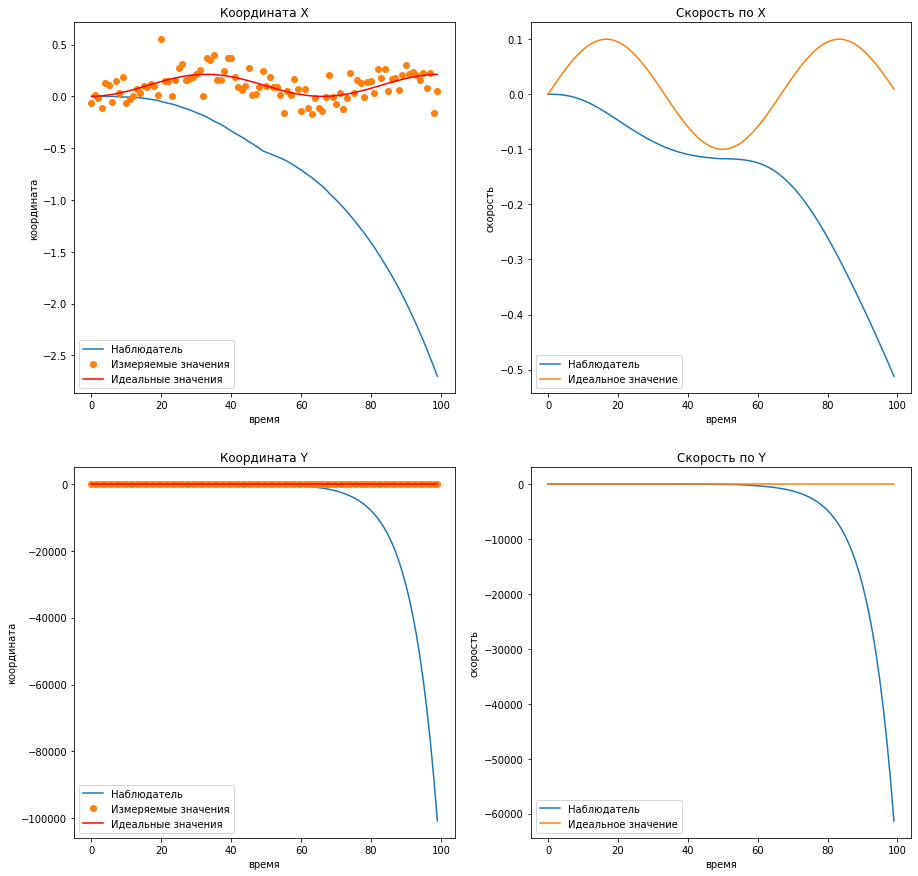

In [42]:
Xt, Yt, Xmeasured, Ymeasured, Xexact, Yexact, Vtx, Vty, Vexactx, Vexacty = observerXY_2(m=5, disp = 0.001, v0 = 0.1, restart_P = True)
fig, axs = plt.subplots(2, 2, figsize=(15,15))

axs[0, 0].set_title("Координата X")
axs[0, 0].plot(Xt, label='Наблюдатель')
axs[0, 0].plot(Xmeasured, label='Измеряемые значения', marker='o', linestyle='None')
axs[0, 0].plot(Xexact, label='Идеальные значения', color='red')
axs[0, 0].set_xlabel('время')
axs[0, 0].set_ylabel('координата')
axs[0, 0].legend()

axs[0, 1].set_title("Скорость по X")
axs[0, 1].plot(Vtx, label='Наблюдатель')
axs[0, 1].plot(Vexactx, label='Идеальное значение')
axs[0, 1].set_xlabel('время')
axs[0, 1].set_ylabel('скорость')
axs[0, 1].legend()

axs[1, 0].set_title("Координата Y")
axs[1, 0].plot(Yt, label='Наблюдатель')
axs[1, 0].plot(Ymeasured, label='Измеряемые значения', marker='o', linestyle='None')
axs[1, 0].plot(Yexact, label='Идеальные значения', color='red')
axs[1, 0].set_xlabel('время')
axs[1, 0].set_ylabel('координата')
axs[1, 0].legend()

axs[1, 1].set_title("Скорость по Y")
axs[1, 1].plot(Vty, label='Наблюдатель')
axs[1, 1].plot(Vexacty, label='Идеальное значение')
axs[1, 1].set_xlabel('время')
axs[1, 1].set_ylabel('скорость')
axs[1, 1].legend()

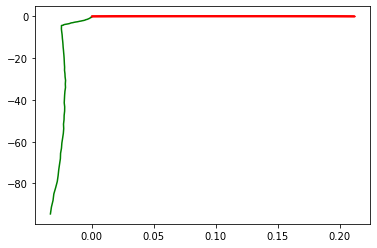

In [43]:
Xt, Yt, Xmeasured, Ymeasured, Xexact, Yexact, Vtx, Vty, Vexactx, Vexacty = observerXY_2(m=5, disp = 0.00001, v0 = 0.1, restart_P = True)
plt.plot(Xt, Yt, color='green')
plt.plot(Xexact, Yexact, color='red')

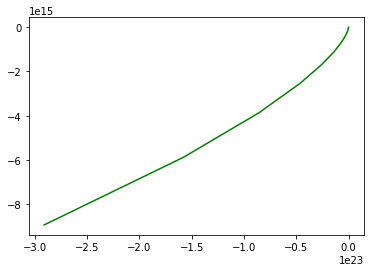

In [27]:
Xt, Yt, Xmeasured, Ymeasured, Xexact, Yexact, Vtx, Vty, Vexactx, Vexacty = observerXY_2(m=2, disp = 0.01, v0 = 0.1, restart_P = False)
plt.plot(Xt, Yt, color='green')
plt.plot(Xexact, Yexact, color='red')

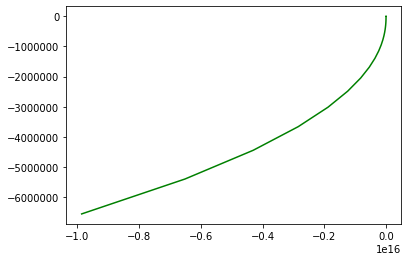

In [28]:
Xt, Yt, Xmeasured, Ymeasured, Xexact, Yexact, Vtx, Vty, Vexactx, Vexacty = observerXY_2(m=5, disp = 0.01, v0 = 0.1, restart_P = False)
plt.plot(Xt, Yt, color='green')
plt.plot(Xexact, Yexact, color='red')

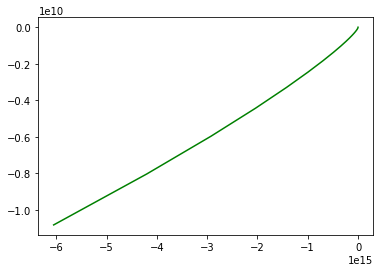

In [29]:
Xt, Yt, Xmeasured, Ymeasured, Xexact, Yexact, Vtx, Vty, Vexactx, Vexacty = observerXY_2(m=5, disp = 0.01, v0 = 1, restart_P = False)
plt.plot(Xt, Yt, color='green')
plt.plot(Xexact, Yexact, color='red')

**Управление**

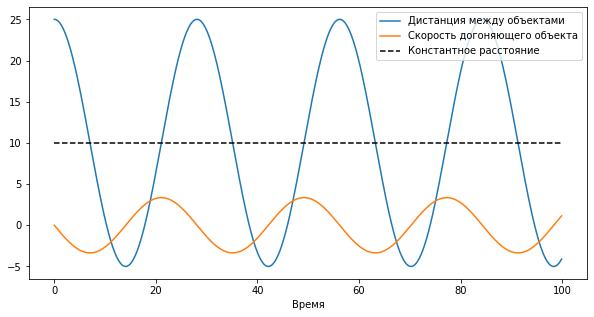

In [30]:
# Без учета текущей скорости
def RHS(z,t):
    zset = 10
    a = 0.05
    
    f1 = z[1]
    f2 = -a*(z[0]-zset)   # -a*(z[0]-zset) - управляющее воздействие
    return f1,f2

t = np.arange(0, 100, 0.1)
z0 = [25, 0]  # начальное значение расстояния и скорости второго объекта
z = odeint(RHS, z0, t)

plt.figure(figsize=(10,5))
plt.plot (t, z[:,0], label="Дистанция между объектами")
plt.plot (t, z[:,1], label='Скорость догоняющего объекта')
plt.plot (t, [10]*len(t), 'k--',label="Константное расстояние")
plt.xlabel('Время')
plt.legend()

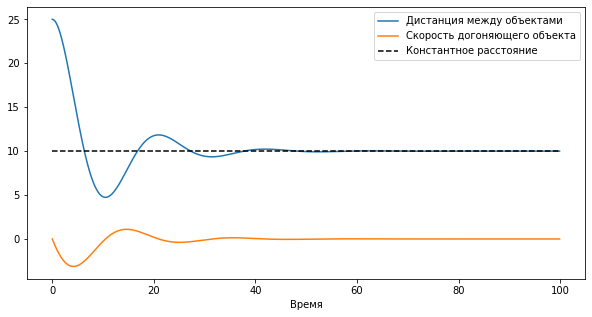

In [31]:
# C учетом текущей скорости
def RHS(z,t):
    zset = 10
    a = 0.1
    b = 0.2
    
    f1 = z[1]
    f2 = -a*(z[0]-zset) - b*z[1]  # -a*(z[0]-zset) - управляющее воздействие.  - b*z[1] - добавяляем реакцию на текущую скорость
    return f1,f2

t = np.arange(0, 100, 0.1)
z0 = [25,0]  # начальное значение расстояния и скорости второго объекта
z = odeint(RHS, z0, t)

plt.figure(figsize=(10,5))
plt.plot (t, z[:,0], label="Дистанция между объектами")
plt.plot (t, z[:,1], label='Скорость догоняющего объекта')
plt.plot (t, [10]*len(t), 'k--',label="Константное расстояние")
plt.xlabel('Время')
plt.legend()

In [32]:
# Добавляем пропорциональный, интегральный, дифференциальный регуляторы
def RHS(y,t,u,Kp,taup):
    # Kp - усиление процесса
    # taup - постоянная времени процесса
    f = -y/taup + Kp/taup * u
    
    return f

def Process(t, Sp, Kp, taup, thetap, Kcp, Kci, Kcd):
    # t - время моделирования
    # Sp - set point - дефолтное значение, которое хотим добиться
    # Kp - усиление процесса (для модели)
    # tuap - постоянная времени процесса (для модели)
    # thetap -параметр для задержки моделирования
    # Kcp - коэффициент пропорционального регуляторов
    # Kci - коэффициент интегрального регуляторов
    # Kcd - коэффициент дифференциального регуляторов
    
    ns = len(t) - 1
    delta_t = t[1]-t[0]
    ndelay = int(np.ceil(thetap/delta_t))  # задержка моделирования
    
    #recording values
    u = np.zeros(ns+1)  # - управляющее действие
    pv = np.zeros(ns+1)  # - скорость
    e = np.zeros(ns+1)  # - ошибка
    ie = np.zeros(ns+1)  # - интеграл ошибки
    dpv = np.zeros(ns+1)  # - производная азовой переменной
    P = np.zeros(ns+1)  # - пропорциональный регулятор
    I = np.zeros(ns+1)  # - интегральный регулятор
    D = np.zeros(ns+1)  # - дифференциальный регулятор
        
    # диапазон управляющего действия
    u_hi = 1000.0
    u_lo = -1000.0
        
    # итерируемся по времени    
    for i in range(0,ns):
        e[i] = Sp[i] - pv[i]
        if i >= 1:
            dpv[i] = (pv[i] - pv[i-1])/delta_t
            ie[i] = ie[i-1] + e[i] * delta_t
        P[i] = Kcp * e[i]
        I[i] = Kci * ie[i]
        D[i] = Kcd * dpv[i]
        #print(u[0], P[i], I[i], D[i])
        u[i] = u[0] + P[i] + I[i] + D[i]
        if u[i] > u_hi: #check upper limit
            u[i] = u_hi
            ie[i] = ie[i-1] + e[i] * delta_t
        if u[i] < u_lo: #check lower limit
            u[i] = u_lo
            ie[i] = ie[i-1] + e[i] * delta_t
        #implement time delay
        iu = max(0,i-ndelay)
        z = odeint(RHS, pv[i], [0,delta_t], args=(u[iu],Kp,taup))
        pv[i+1] = z[-1]
    u[ns] = u[ns-1]
    ie[ns] = ie[ns-1]
    P[ns] = P[ns-1]
    I[ns] = I[ns-1]
    D[ns] = D[ns-1]

    return (pv,u)  # скорость, "Управляющее воздействие"

In [33]:
ns = 1000
t = np.arange(0,ns+1,1)
#Model parameters
Kp = 1
taup = 250.0
thetap = 0.5

# Моделирования для константного расстояния
Sp_const = np.zeros(ns+1)
Sp_const[:] = 10

Kcp = 0
Kci = 0
Kcd = 0.0
(pv_11, op_11) = Process(t, Sp_const, Kp, taup, thetap, Kcp, Kci, Kcd)

Kcp = 2
Kci = 0
Kcd = 0.0
(pv_12, op_12) = Process(t, Sp_const, Kp, taup, thetap, Kcp, Kci, Kcd)

Kcp = 2
Kci = 0.2
Kcd = 0.0
(pv_13, op_13) = Process(t, Sp_const, Kp, taup, thetap, Kcp, Kci, Kcd)

Kcp = 2
Kci = 0.2
Kcd = 0.1
(pv_14, op_14) = Process(t, Sp_const, Kp, taup, thetap, Kcp, Kci, Kcd)


# Моделирования для изменяющегося расстояния
Sp = np.zeros(ns+1)
Sp[:200] = 10
Sp[200:400] = 30
Sp[400:800] = 5
Sp[800:] = 40

Kcp = 0
Kci = 0
Kcd = 0.0
(pv_21, op_21) = Process(t, Sp, Kp, taup, thetap, Kcp, Kci, Kcd)

Kcp = 2
Kci = 0
Kcd = 0.0
(pv_22, op_22) = Process(t, Sp, Kp, taup, thetap, Kcp, Kci, Kcd)

Kcp = 2
Kci = 0.2
Kcd = 0.0
(pv_23, op_23) = Process(t, Sp, Kp, taup, thetap, Kcp, Kci, Kcd)

Kcp = 2
Kci = 0.2
Kcd = 5
(pv_24, op_24) = Process(t, Sp, Kp, taup, thetap, Kcp, Kci, Kcd)

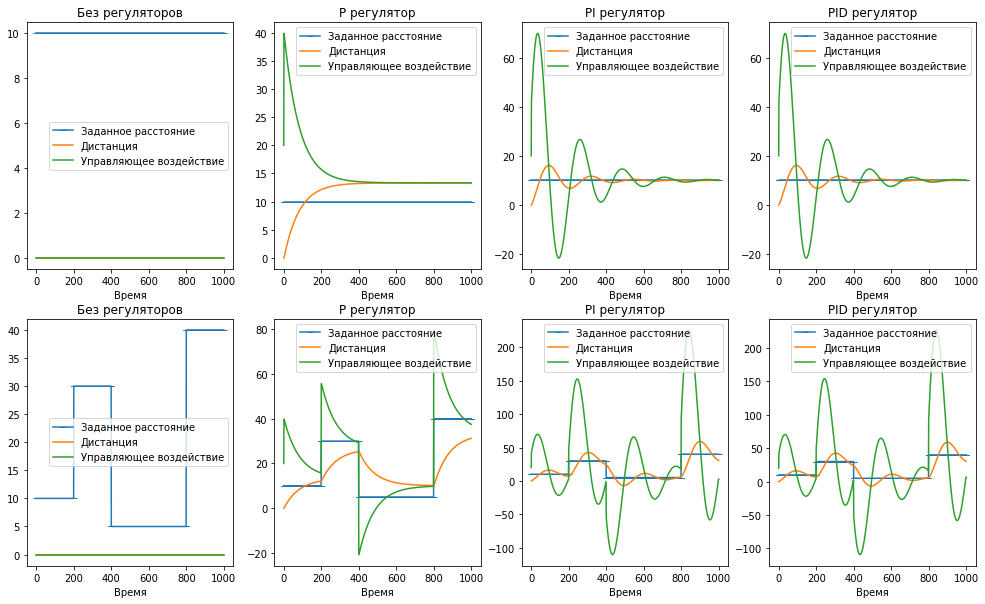

In [34]:
fig, axs = plt.subplots(2, 4, figsize=(17,10))

# Моделирования для константного расстояния
axs[0, 0].set_title("Без регуляторов")
axs[0, 0].plot(Sp_const, label='Заданное расстояние', marker='_')
axs[0, 0].plot(pv_11, label='Дистанция')
axs[0, 0].plot(op_11, label='Управляющее воздействие')
axs[0, 0].set_xlabel('Время')
axs[0, 0].legend()

axs[0, 1].set_title("P регулятор")
axs[0, 1].plot(Sp_const, label='Заданное расстояние', marker='_')
axs[0, 1].plot(pv_12, label='Дистанция')
axs[0, 1].plot(op_12, label='Управляющее воздействие')
axs[0, 1].set_xlabel('Время')
axs[0, 1].legend()

axs[0, 2].set_title("PI регулятор")
axs[0, 2].plot(Sp_const, label='Заданное расстояние', marker='_')
axs[0, 2].plot(pv_13, label='Дистанция')
axs[0, 2].plot(op_13, label='Управляющее воздействие')
axs[0, 2].set_xlabel('Время')
axs[0, 2].legend()

axs[0, 3].set_title("PID регулятор")
axs[0, 3].plot(Sp_const, label='Заданное расстояние', marker='_')
axs[0, 3].plot(pv_14, label='Дистанция')
axs[0, 3].plot(op_14, label='Управляющее воздействие')
axs[0, 3].set_xlabel('Время')
axs[0, 3].legend()

# Моделирования для изменяющегося расстояния
axs[1, 0].set_title("Без регуляторов")
axs[1, 0].plot(Sp, label='Заданное расстояние', marker='_')
axs[1, 0].plot(pv_21, label='Дистанция')
axs[1, 0].plot(op_21, label='Управляющее воздействие')
axs[1, 0].set_xlabel('Время')
axs[1, 0].legend()

axs[1, 1].set_title("P регулятор")
axs[1, 1].plot(Sp, label='Заданное расстояние', marker='_')
axs[1, 1].plot(pv_22, label='Дистанция')
axs[1, 1].plot(op_22, label='Управляющее воздействие')
axs[1, 1].set_xlabel('Время')
axs[1, 1].legend()

axs[1, 2].set_title("PI регулятор")
axs[1, 2].plot(Sp, label='Заданное расстояние', marker='_')
axs[1, 2].plot(pv_23, label='Дистанция')
axs[1, 2].plot(op_23, label='Управляющее воздействие')
axs[1, 2].set_xlabel('Время')
axs[1, 2].legend()

axs[1, 3].set_title("PID регулятор")
axs[1, 3].plot(Sp, label='Заданное расстояние', marker='_')
axs[1, 3].plot(pv_24, label='Дистанция')
axs[1, 3].plot(op_24, label='Управляющее воздействие')
axs[1, 3].set_xlabel('Время')
axs[1, 3].legend()